In [1]:
%%capture
!git clone https://github.com/ultralytics/ultralytics.git
!pip install -r requirements.txt
!pip install ultralytics

In [2]:
%%capture
!pip install ultralytics onnx onnxruntime

In [7]:
# import cv2
# import random
# import math
# from IPython.display import Image
# from PIL import Image
# import torch
# import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
from ultralytics import YOLO

import ultralytics
# проверка на успешную установку и импорт библиотеки ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5934.0/8062.4 GB disk)


In [8]:
# путь к модели прямоугольных труб
model_squares_path = '/kaggle/input/19-oct-squares/onnx/default/1/19-october.onnx'
# путь к модели круглых труб
model_circles_path = '/kaggle/input/11-oct-circles/onnx/default/1/11-oct.onnx'
# путь к папке прямоугольных труб
test_squres_path = '/kaggle/input/squares/1'
# путь к папке круглых труб
test_circles_path = '/kaggle/input/circles/0'

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /kaggle/input/19-oct-squares/onnx/default/1/19-october.onnx for ONNX Runtime inference...

image 1/3 /kaggle/input/squares/1/IMG_2930.JPG: 640x640 252 1s, 115.5ms
image 2/3 /kaggle/input/squares/1/IMG_2931.JPG: 640x640 297 1s, 185.1ms
image 3/3 /kaggle/input/squares/1/IMG_2968.JPG: 640x640 185 1s, 142.5ms
Speed: 5.2ms preprocess, 147.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
252


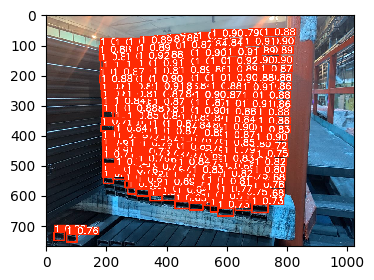

297


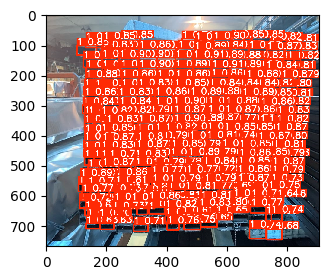

185


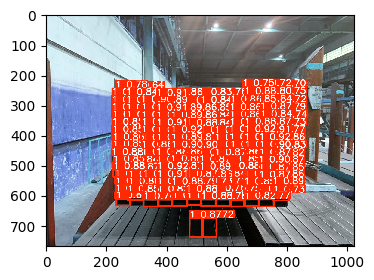

Loading /kaggle/input/11-oct-circles/onnx/default/1/11-oct.onnx for ONNX Runtime inference...

image 1/3 /kaggle/input/circles/0/IMG_2947.JPG: 640x640 126 pipes, 110.1ms
image 2/3 /kaggle/input/circles/0/IMG_2955.JPG: 640x640 104 pipes, 105.2ms
image 3/3 /kaggle/input/circles/0/IMG_2956.JPG: 640x640 104 pipes, 103.4ms
Speed: 5.8ms preprocess, 106.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
126


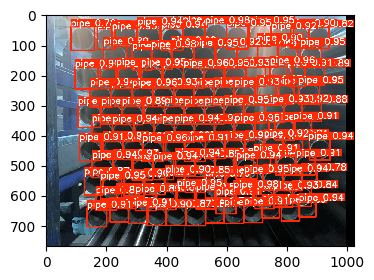

104


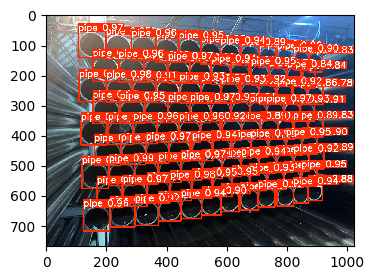

104


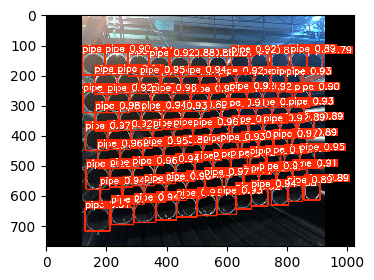

In [9]:
# Установление размера показа размеченных фоток
plt.rcParams["figure.figsize"] = (20,3)

# инициализация модели и предсказание
squares_model = YOLO(model_squares_path)
circles_model = YOLO(model_circles_path)

squares = []
for i in squares_model(test_squres_path, conf=0.55, iou=0.3):
    count = len(i.boxes)
    squares.append(count)
    print(count)
    array = i.plot()
    plt.imshow(array, interpolation='nearest')
    plt.show()

circles = []
for i in circles_model(test_circles_path, conf=0.55, iou=0.3):
    count = len(i.boxes)
    circles.append(count)
    print(count)
    array = i.plot()
    plt.imshow(array, interpolation='nearest')
    plt.show()

# датафрейм
len_first_dataset = len(squares)
result_df = pd.DataFrame(columns=['img_path', 'annoth_path', 'pipe_class', 'pipe_count'])
for idx, fname in enumerate(os.listdir(test_squres_path)):
    file_path = f'{test_squres_path}/{fname}'
    result_df.loc[idx] = [file_path, fname.split('.')[0] + '.png', '1', squares[idx]]

for idx, fname in enumerate(os.listdir(test_circles_path)):
    file_path = f'{test_circles_path}/{fname}'
    result_df.loc[len_first_dataset + idx] = [file_path, fname.split('.')[0] + '.png', '0', circles[idx]]
# создание csv-файла - готового сабмита
result_df.to_csv('submit.csv', sep=';', index=False)